In [1]:
import pandas as pd
crash_data = pd.read_csv('crash_data.csv', na_values=['NaN'])

In [2]:
crash_data.head()

,Crash_date,Crash_time,Borough,NumInjured,NumKilled,Factor1,Factor2,Collison_id,Vehi_type1,Vehi_type2
0,01/01/2013,0:40,NaN,0.0,0.0,Outside Car Distraction,NaN,2997715,PASSENGER VEHICLE,NaN
1,01/01/2013,12:20,NaN,0.0,0.0,Glare,NaN,62585,PASSENGER VEHICLE,NaN
2,01/01/2013,22:45,NaN,0.0,0.0,Unspecified,Unspecified,205113,VAN,UNKNOWN
3,01/01/2013,5:00,NaN,0.0,0.0,Traffic Control Disregarded,Unspecified,209953,BUS,PASSENGER VEHICLE
4,01/01/2013,7:56,BROOKLYN,1.0,0.0,Unspecified,Unspecified,157104,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON


In [3]:
crash_data['Crash_year'] = pd.to_numeric(crash_data['Crash_date'].str.split('/',expand=True)[2])
crash_data['Crash_mon'] = pd.to_numeric(crash_data['Crash_date'].str.split('/',expand=True)[1])
crash_data = crash_data.loc[crash_data['Crash_year'] > 2018]
crash_data = crash_data.reset_index()

In [4]:
crash_data

,index,Crash_date,Crash_time,Borough,NumInjured,NumKilled,Factor1,Factor2,Collison_id,Vehi_type1,Vehi_type2,Crash_year,Crash_mon
0,1319862,01/01/2019,17:00,NaN,0.0,0.0,Unspecified,Unspecified,4060927,Sedan,Sedan,2019,1
1,1319863,01/01/2019,1:30,NaN,1.0,0.0,Alcohol Involvement,NaN,4129434,Station Wagon/Sport Utility Vehicle,NaN,2019,1
2,1319864,01/01/2019,1:55,NaN,0.0,0.0,Unspecified,NaN,4060684,Taxi,NaN,2019,1
3,1319865,01/01/2019,0:20,QUEENS,0.0,0.0,Following Too Closely,Unspecified,4060563,Station Wagon/Sport Utility Vehicle,Sedan,2019,1
4,1319866,01/01/2019,3:30,QUEENS,1.0,0.0,Fatigued/Drowsy,Unspecified,4060689,Sedan,Station Wagon/Sport Utility Vehicle,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211480,1531342,12/31/2019,15:09,NaN,2.0,0.0,Following Too Closely,Unspecified,4269027,Sedan,Sedan,2019,31
211481,1531343,12/31/2019,6:15,BRONX,1.0,0.0,Driver Inattention/Distraction,Unspecified,4266927,Sedan,Station Wagon/Sport Utility Vehicle,2019,31
211482,1531344,12/31/2019,13:24,BRONX,0.0,0.0,Driver Inattention/Distraction,Unspecified,4269528,Sedan,NaN,2019,31
211483,1531345,12/31/2019,11:20,BROOKLYN,0.0,0.0,Failure to Yield Right-of-Way,Unspecified,4267245,Station Wagon/Sport Utility Vehicle,Box Truck,2019,31


In [5]:
# Most dangerous time? -- calculated by num of accidents
# Most dangerous action? -- calculated by num of injured and killed

In [6]:
crash_data.describe()#there are some missing values

,index,NumInjured,NumKilled,Collison_id,Crash_year,Crash_mon
count,2.114850e+05,211485.000000,211485.000000,2.114850e+05,211485.0,211485.000000
mean,1.425604e+06,0.290276,0.001154,4.162501e+06,2019.0,15.660406
std,6.105061e+04,0.676322,0.034773,6.123196e+04,0.0,8.749884
min,1.319862e+06,0.000000,0.000000,3.822228e+06,2019.0,1.000000
25%,1.372733e+06,0.000000,0.000000,4.109541e+06,2019.0,8.000000
50%,1.425604e+06,0.000000,0.000000,4.162511e+06,2019.0,16.000000
75%,1.478475e+06,0.000000,0.000000,4.215451e+06,2019.0,23.000000
max,1.531346e+06,20.000000,2.000000,4.479833e+06,2019.0,31.000000


In [7]:
def parts_of_day(x):
    if (x < 3):
        return 'Midnight'
    elif (x >= 3 and x <6):
        return 'Toward morning'
    elif (x >= 6 and x < 9):
        return 'Early Morning'
    elif (x >= 9 and x < 12):
        return 'Late Morning'
    elif (x >= 12 and x < 16):
        return 'Early Afternoon'
    elif (x >= 16 and x < 18):
        return 'Late Afternoon'
    elif (x >= 18 and x <= 21):
        return 'Evening'
    else:
        return 'Night'

In [8]:
from datetime import datetime
import holidays
us_holidays = holidays.US()

crash_data['Date_time'] = crash_data['Crash_date'].map(str) + ' ' + crash_data['Crash_time'].map(str)
crash_data['Is_holiday'] = 0 
crash_data['Day_part'] = 0

for i in range(len(crash_data)):
    crash_data['Is_holiday'][i] = crash_data['Date_time'][i] in us_holidays
    crash_data['Day_part'][i] = parts_of_day(int(crash_data['Crash_time'][i].split(':')[0]))
    #print(crash_data['Day_part'][i])
    #print(i)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [35]:
crash_data.to_csv('crash_date_data.csv',encoding='utf-8',index=False)

## Q1

In [10]:
Q1_result = crash_data.groupby(['Is_holiday','Day_part']).size().unstack()

In [11]:
Q1_result.plot(kind='barh', figsize=[16,6])

In [12]:
us_holidays

{datetime.date(2019, 1, 1): "New Year's Day",
 datetime.date(2019, 1, 21): 'Martin Luther King Jr. Day',
 datetime.date(2019, 2, 18): "Washington's Birthday",
 datetime.date(2019, 5, 27): 'Memorial Day',
 datetime.date(2019, 7, 4): 'Independence Day',
 datetime.date(2019, 9, 2): 'Labor Day',
 datetime.date(2019, 10, 14): 'Columbus Day',
 datetime.date(2019, 11, 11): 'Veterans Day',
 datetime.date(2019, 11, 28): 'Thanksgiving',
 datetime.date(2019, 12, 25): 'Christmas Day'}

In [13]:
Q1_result

Day_part,Early Afternoon,Early Morning,Evening,Late Afternoon,Late Morning,Midnight,Night,Toward morning
Is_holiday,,,,,,,,
False,51269,23966,38159,29215,32348,12930,11959,7609
True,1015,292,760,497,509,391,317,249


In [14]:
Q = Q1_result
Q.iloc[[0]] = Q.iloc[[0]] /355
Q.iloc[[1]] = Q.iloc[[1]] /10

In [15]:
Q

Day_part,Early Afternoon,Early Morning,Evening,Late Afternoon,Late Morning,Midnight,Night,Toward morning
Is_holiday,,,,,,,,
False,144.419718,67.509859,107.490141,82.295775,91.121127,36.422535,33.687324,21.433803
True,101.500000,29.200000,76.000000,49.700000,50.900000,39.100000,31.700000,24.900000


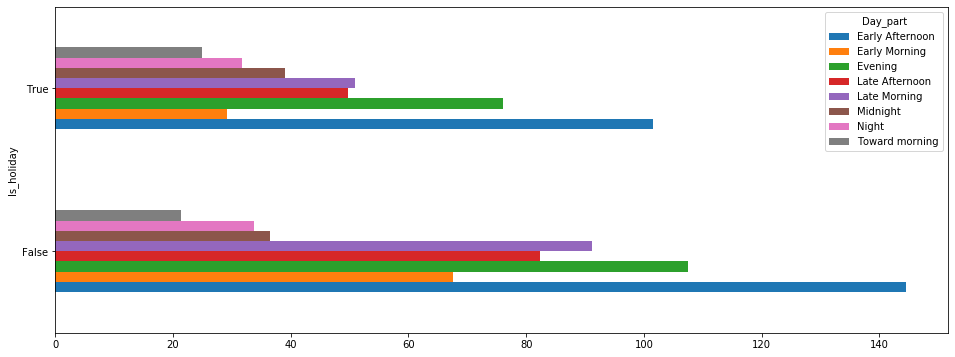

In [16]:
Q.plot(kind='barh', figsize=[16,6])

In [17]:
# The top3 dangerous time are 12:00pm ~ 16:00 pm, 18:00 pm ~ 21:00 pm, 9:00 am ~ 12:00 am periods

## Q2

In [18]:
crash_data["Factor1"] = crash_data["Factor1"].astype('category')
crash_data["Factor1"] = crash_data["Factor1"].cat.codes

crash_data["Factor2"] = crash_data["Factor2"].astype('category')
crash_data["Factor2"] = crash_data["Factor2"].cat.codes

crash_data["Vehi_type1"] = crash_data["Vehi_type1"].astype('category')
crash_data["Vehi_type1"] = crash_data["Vehi_type1"].cat.codes

crash_data["Vehi_type2"] = crash_data["Vehi_type2"].astype('category')
crash_data["Vehi_type2"] = crash_data["Vehi_type2"].cat.codes

In [120]:
crash_data_encoded = crash_data

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np

all_inputs = crash_data_encoded[['Factor1', 'Factor2','Vehi_type1', 'Vehi_type2']].values


crash_data_encoded['Num'] = crash_data_encoded['NumInjured'] + crash_data_encoded['NumKilled']
crash_data_encoded['Num_cat'] = np.where(crash_data_encoded['Num']  > 0, 1,0)
all_labels = crash_data_encoded[['Num_cat']].values

all_ = crash_data_encoded[['Factor1', 'Factor2','Vehi_type1', 'Vehi_type2','Num_cat']]

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [21]:
crash_data_encoded

,index,Crash_date,Crash_time,Borough,NumInjured,NumKilled,Factor1,Factor2,Collison_id,Vehi_type1,Vehi_type2,Crash_year,Crash_mon,Date_time,Is_holiday,Day_part,Num,Num_cat
0,1319862,01/01/2019,17:00,NaN,0.0,0.0,50,50,4060927,234,267,2019,1,01/01/2019 17:00,True,Late Afternoon,0.0,0
1,1319863,01/01/2019,1:30,NaN,1.0,0.0,2,-1,4129434,240,-1,2019,1,01/01/2019 1:30,True,Midnight,1.0,1
2,1319864,01/01/2019,1:55,NaN,0.0,0.0,50,-1,4060684,264,-1,2019,1,01/01/2019 1:55,True,Midnight,0.0,0
3,1319865,01/01/2019,0:20,QUEENS,0.0,0.0,17,50,4060563,240,267,2019,1,01/01/2019 0:20,True,Midnight,0.0,0
4,1319866,01/01/2019,3:30,QUEENS,1.0,0.0,15,50,4060689,234,272,2019,1,01/01/2019 3:30,True,Toward morning,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211480,1531342,12/31/2019,15:09,NaN,2.0,0.0,17,50,4269027,234,267,2019,31,12/31/2019 15:09,False,Early Afternoon,2.0,1
211481,1531343,12/31/2019,6:15,BRONX,1.0,0.0,8,50,4266927,234,272,2019,31,12/31/2019 6:15,False,Early Morning,1.0,1
211482,1531344,12/31/2019,13:24,BRONX,0.0,0.0,8,50,4269528,234,-1,2019,31,12/31/2019 13:24,False,Early Afternoon,0.0,0
211483,1531345,12/31/2019,11:20,BROOKLYN,0.0,0.0,14,50,4267245,240,38,2019,31,12/31/2019 11:20,False,Late Morning,0.0,0


In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8206823178948862
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 4, 'splitter': 'best'}


In [24]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(697.5, 489.24, 'X[1] <= -0.5\ngini = 0.337\nsamples = 211485\nvalue = [166046, 45439]'),
 Text(348.75, 380.52000000000004, 'X[0] <= 23.5\ngini = 0.476\nsamples = 33277\nvalue = [20284, 12993]'),
 Text(174.375, 271.8, 'X[0] <= 13.5\ngini = 0.409\nsamples = 10094\nvalue = [2889, 7205]'),
 Text(87.1875, 163.08000000000004, 'X[2] <= 35.0\ngini = 0.457\nsamples = 6959\nvalue = [2455, 4504]'),
 Text(43.59375, 54.360000000000014, 'gini = 0.333\nsamples = 1096\nvalue = [231, 865]'),
 Text(130.78125, 54.360000000000014, 'gini = 0.471\nsamples = 5863\nvalue = [2224, 3639]'),
 Text(261.5625, 163.08000000000004, 'X[0] <= 14.5\ngini = 0.239\nsamples = 3135\nvalue = [434, 2701]'),
 Text(217.96875, 54.360000000000014, 'gini = 0.15\nsamples = 2624\nvalue = [214, 2410]'),
 Text(305.15625, 54.360000000000014, 'gini = 0.49\nsamples = 511\nvalue = [220, 291]'),
 Text(523.125, 271.8, 'X[2] <= 35.0\ngini = 0.375\nsamples = 23183\nvalue = [17395, 5788]'),
 Text(435.9375, 163.08000000000004, 'X[2] <= 33

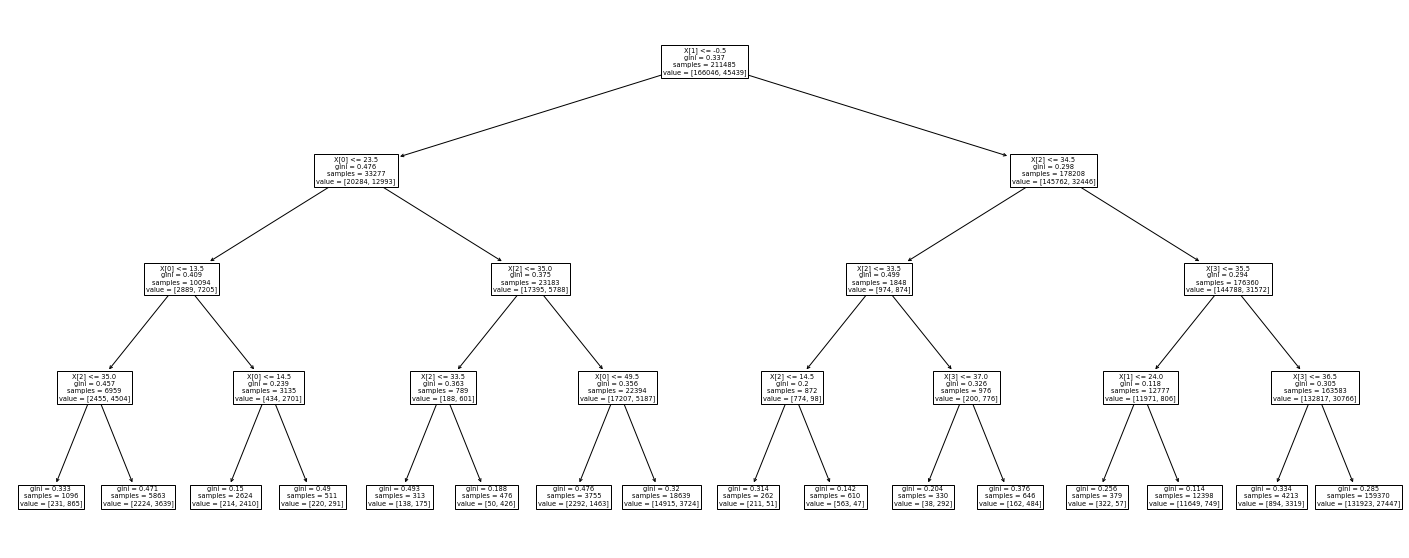

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree_classifier)

In [28]:
import graphviz 
dot_data = tree.export_graphviz(decision_tree_classifier, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("crash")

'crash.pdf'

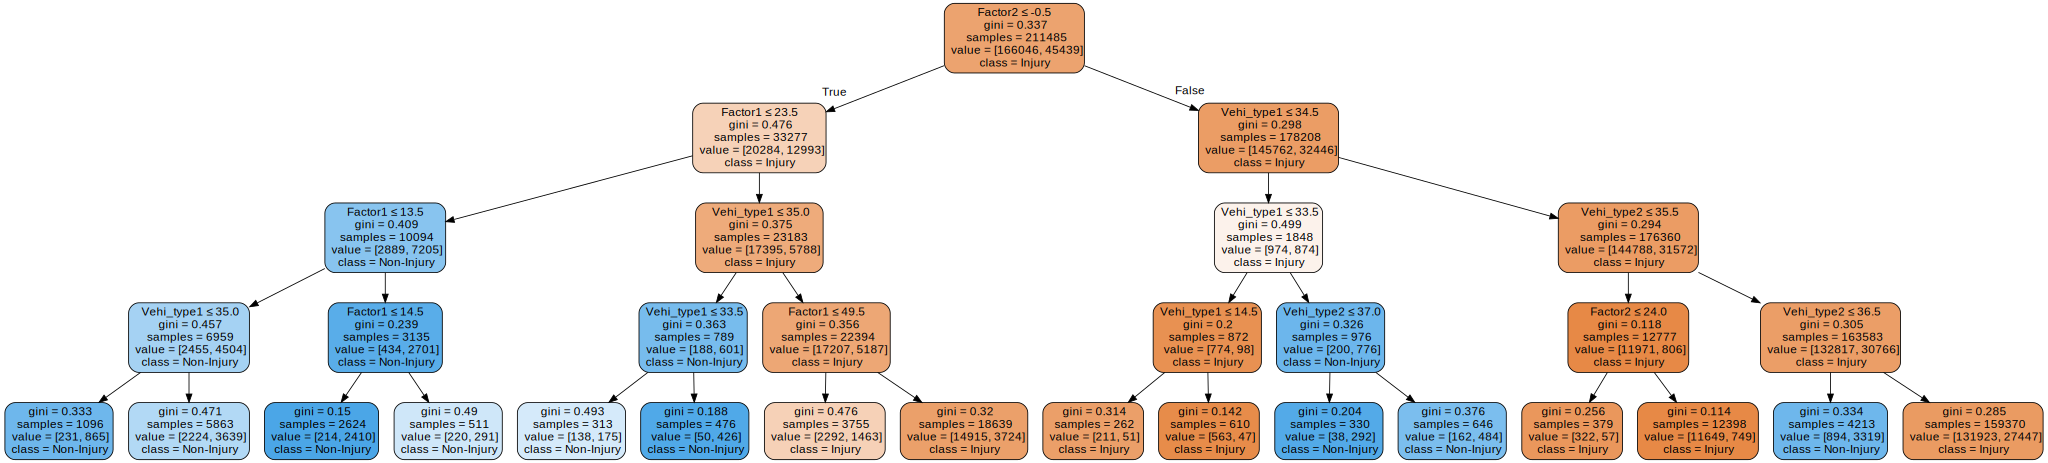

In [34]:
dot_data = tree.export_graphviz(decision_tree_classifier, out_file=None, 
                      feature_names=['Factor1', 'Factor2','Vehi_type1', 'Vehi_type2'],  
                      class_names=['Injury','Non-Injury'],  
                      filled=True, rounded=True,  
                      special_characters=True)
graph = graphviz.Source(dot_data) 
graph

In [41]:
crash_cate = pd.read_csv('crash_date_data.csv', na_values=['NaN'])

In [48]:
cate_Factor1 = crash_cate[['Factor1']]
cate_Factor1['Factor1_code'] = crash_data['Factor1']

cate_Factor2 = crash_cate[['Factor2']]
cate_Factor2['Factor2_code'] = crash_data['Factor2']

cate_Vehi_type1 = crash_cate[['Vehi_type1']]
cate_Vehi_type1['Vehi_type1_code'] = crash_data['Vehi_type1']

cate_Vehi_type2 = crash_cate[['Vehi_type2']]
cate_Vehi_type2['Vehi_type2_code'] = crash_data['Vehi_type2']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [64]:
cate_Factor1 = cate_Factor1.sort_values(by = 'Factor1').drop_duplicates()
cate_Factor1

,Factor1,Factor1_code
65681,Accelerator Defective,0
142848,Aggressive Driving/Road Rage,1
65645,Alcohol Involvement,2
22441,Animals Action,3
62000,Backing Unsafely,4
190658,Brakes Defective,5
178248,Cell Phone (hand-Held),6
210801,Cell Phone (hands-free),7
164919,Driver Inattention/Distraction,8
19757,Driver Inexperience,9


In [69]:
cate_Factor2 = cate_Factor2.sort_values(by = 'Factor2').drop_duplicates()
cate_Factor2

,Factor2,Factor2_code
74402,Accelerator Defective,0
28031,Aggressive Driving/Road Rage,1
150667,Alcohol Involvement,2
66541,Animals Action,3
70947,Backing Unsafely,4
164082,Brakes Defective,5
93742,Cell Phone (hand-Held),6
71016,Cell Phone (hands-free),7
137280,Driver Inattention/Distraction,8
153788,Driver Inexperience,9


In [66]:
cate_Vehi_type1 = cate_Vehi_type1.sort_values(by = 'Vehi_type1').drop_duplicates()
cate_Vehi_type1

,Vehi_type1,Vehi_type1_code
198899,197209,0
207019,2 dr sedan,1
166242,2015,2
154199,3 WHE,3
93022,3-Door,4
...,...,...
130858,vespa,379
39707,wagon,380
15004,omm,381
80165,�MBU,382


In [68]:
cate_Vehi_type2 = cate_Vehi_type2.sort_values(by = 'Vehi_type2').drop_duplicates()
cate_Vehi_type2

,Vehi_type2,Vehi_type2_code
198356,00000,0
172806,11 PA,1
54335,16M,2
186615,2 HOR,3
207350,2 dr sedan,4
...,...,...
115053,wagon,438
176153,wheel,439
49715,white,440
130619,yello,441
